Lựa chọn thuật toán phù hợp trong “Machine Learning
with Python”   
(chọn ít nhất 3 thuật toán để thực hiện và
đánh giá )

In [110]:
#import thư viện
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import timeit
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
#đọc dữ liệu
df1 =pd.read_csv('Danh_gia_cleaned_updated.csv')

In [49]:
# kiểm tra dữ liệu bị thiếu
print(df1.isnull().sum())

ma_khach_hang            0
noi_dung_binh_luan       0
ngay_binh_luan           0
gio_binh_luan            0
so_sao                   0
ma_san_pham              0
content_new           1691
dtype: int64


In [50]:
# thay thế giá trị thiếu bằng chuỗi rỗng
df1['content_new']=df1['content_new'].fillna('')


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ma_khach_hang       20674 non-null  int64 
 1   noi_dung_binh_luan  20674 non-null  object
 2   ngay_binh_luan      20674 non-null  object
 3   gio_binh_luan       20674 non-null  object
 4   so_sao              20674 non-null  int64 
 5   ma_san_pham         20674 non-null  int64 
 6   content_new         20674 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [52]:
#xem vài dòng
df1.head(10)

,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,content_new
0,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015,dễ_dàng thoải_mái
1,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015,dễ_dàng thoải_mái
2,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594,thích hasaki_tẩy
3,2519,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,17/07/2022,13:48,5,204100075,sạch tốt loại_bỏ bẩn dầu_thừa kích_ứng sạch mà...
4,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977,rửa tốt sạch mịn
5,2517,"Sau 77 49 dòng srm, thì chân ái là đây, mua tu...",25/12/2022,17:11,5,204100019,chân_ái thử khô khô nổi
6,1750,Đó giờ mình sài bha của obagi cũng 3-4 chai rồ...,9/7/2022,4:34,5,100220035,xài đổi kèm tặng trừ
7,3394,Rất ok mình xài 2 chai rồi,7/7/2022,11:18,5,204100024,đồng_ý xài
8,1817,"Mik bị kich ứng, không hợp sản phẩm, sd được 3...",5/2/2024,3:50,4,422216354,ứng không_hợp sản_phẩm
9,3556,nhân viên tư vấn như mới train và được nhận vì...,12/9/2023,22:33,5,100250032,tư_vấn đẹp thôi_á dán trả_lời không_như


In [53]:
# làm thống kê
df1.so_sao.describe()

count    20674.000000
mean         4.623634
std          0.889168
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: so_sao, dtype: float64

Nhận xét: số sao từ 1 đến 5 và điểm trung bình là 4.623634, độ lệch chuẩn nhỏ

In [55]:
df1.so_sao.value_counts()
# điểm 1,2,3 rất là ít. các điểm 4,5 người ta khen nhiều 

so_sao
5    16506
4     2144
3      979
1      544
2      501
Name: count, dtype: int64

In [56]:
#ta xem:1,2,3: không hài lòng và 4,5 : là hài lòng
# nếu số sao <=3 thì bằng 0 và ngược lại
df1['sentiment'] = np.where(df1['so_sao']<=3, 1, 0)


In [57]:
# xem lại dữ liệu vài dòng đầu tiên 
df1.head(20)

,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,content_new,sentiment
0,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015,dễ_dàng thoải_mái,0
1,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015,dễ_dàng thoải_mái,0
2,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594,thích hasaki_tẩy,0
3,2519,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,17/07/2022,13:48,5,204100075,sạch tốt loại_bỏ bẩn dầu_thừa kích_ứng sạch mà...,0
4,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977,rửa tốt sạch mịn,0
5,2517,"Sau 77 49 dòng srm, thì chân ái là đây, mua tu...",25/12/2022,17:11,5,204100019,chân_ái thử khô khô nổi,0
6,1750,Đó giờ mình sài bha của obagi cũng 3-4 chai rồ...,9/7/2022,4:34,5,100220035,xài đổi kèm tặng trừ,0
7,3394,Rất ok mình xài 2 chai rồi,7/7/2022,11:18,5,204100024,đồng_ý xài,0
8,1817,"Mik bị kich ứng, không hợp sản phẩm, sd được 3...",5/2/2024,3:50,4,422216354,ứng không_hợp sản_phẩm,0
9,3556,nhân viên tư vấn như mới train và được nhận vì...,12/9/2023,22:33,5,100250032,tư_vấn đẹp thôi_á dán trả_lời không_như,0


In [58]:
df1[df1['so_sao']==3]

,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,content_new,sentiment
36,2723,Dạng sữa thắm hơi lâu và rất rất rất là cay lu...,9/6/2023,13:34,3,248700035,thắm hơi rửa xài,1
53,2528,"sản phẩm cho da dầu thôi, dầu mụn nên cân nhắc...",15/07/2021,8:34,3,343700002,mụn cân_nhắc chăm_sóc mụn bôi lâu_thấm bôi mỏn...,1
69,1370,"cấp ẩm ổn, những vết thâm mới thì làm mờ tốt, ...",15/04/2023,16:18,3,318900002,ẩm_ổn thâm mờ tốt cũ mờ,1
86,1394,"Mình da dầu mụn, mới mua xài thấy mát nhẹ mặt,...",5/10/2021,12:11,3,422200305,mụn xài mát nhẹ,1
104,1453,Mình da dầu. Srm rửa sạch sâu quá khô 2 bênh c...,20/08/2022,11:48,3,204900159,rửa sạch sâu khô_bênh cánh nguyên căng,1
...,...,...,...,...,...,...,...,...
20617,218,"Tạm, bôi lên bết rích khó chịu cực kì, phân kh...",29/03/2022,16:11,3,422216990,tạm bôi cực_kì rẻ,1
20631,1081,"Lần đầu tiên xài nước tẩy trang , kem chống nắ...",1/7/2022,19:49,3,422204904,xài tẩy chống hải_cái kích_ứng,1
20634,1310,"Kem rất bết rích, cảm giác nặng mặt, tán khó, ...",25/03/2022,11:52,3,100160021,bết_rích mặt_tán đặc mặc_dù,1
20643,4145,"Không có gì đáng phàn nàn, sản phẩm phù hợp vớ...",9/2/2022,8:49,3,422205163,phàn_nàn sản_phẩm,1


In [59]:
df1['sentiment'].value_counts()

sentiment
0    18650
1     2024
Name: count, dtype: int64

# Nhận xét:Dữ liệu có khả năng mất cân bằng  
Đánh giá tích cực là: 18650  
Đánh giá không tốt là: 2024

In [61]:
# Tách dữ liệu thành đầu vào (X) và nhãn (y)
X = df1['content_new']
y = df1['sentiment']

In [62]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [63]:
# Vector hóa văn bản bằng TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [64]:
models = [LogisticRegression(),
           MultinomialNB(),
          SVC(probability=True),
         KNeighborsClassifier(),
         DecisionTreeClassifier(random_state = 2)]

In [65]:
from sklearn.model_selection import cross_val_score
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = type(model).__name__
    accuracies = cross_val_score (model, X_train_tfidf, y_train, scoring='accuracy', cv=CV) 
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
cv_df = pd.DataFrame (entries, columns=['model_name', 'accuracy'])

[0.93470375 0.93802902 0.93168077 0.93772672 0.93952223]
[0.93530834 0.93288996 0.93228537 0.93561064 0.93317206]
[0.96221282 0.96644498 0.95798065 0.97007255 0.96855156]
[0.94316808 0.94709794 0.87363966 0.94891173 0.94950106]
[0.96251511 0.96704958 0.96281741 0.97218863 0.96945872]


In [66]:
cv_df.sort_values('accuracy',ascending = False)

,model_name,accuracy
4,DecisionTreeClassifier,0.966806
2,SVC,0.965053
0,LogisticRegression,0.936332
1,MultinomialNB,0.933853
3,KNeighborsClassifier,0.932464


In [80]:
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier()
}

params = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],  # Reduced to only 'gini' and 'entropy'
        'max_depth': [None, 10, 20],  # Limited depth to a few values
        'min_samples_split': [2, 5],  # Reduced to fewer values
        'min_samples_leaf': [1, 2]  # Reduced to fewer values
    },
    'SVC': {
        'C': [1, 10],  # Reduced to just two values for regularization strength
        'kernel': ['linear', 'rbf'],  # Limited kernel types to 'linear' and 'rbf'
        'gamma': ['scale']  # Simplified to just 'scale'
    },
    'KNeighborsClassifier': {
        'n_neighbors': [5, 7],  # Reduced the number of neighbors
        'weights': ['uniform'],  # Use only 'uniform' for simplicity
        'metric': ['euclidean']  # Only 'euclidean' distance metric
    }
}


In [82]:
start_time = timeit.default_timer()

from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train_tfidf, y_train, cv=5)

end_time = timeit.default_timer()
execution_time = round(end_time - start_time,2)
print('Total running time: ',execution_time,' s')

Search for DecisionTreeClassifier ...
Search for SVC ...
Search for KNeighborsClassifier ...
Search is done.
Total running time:  219.47  s


In [83]:
result = search.evaluate_model()


results round for: DecisionTreeClassifier
results round for: SVC
results round for: KNeighborsClassifier


In [88]:
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)

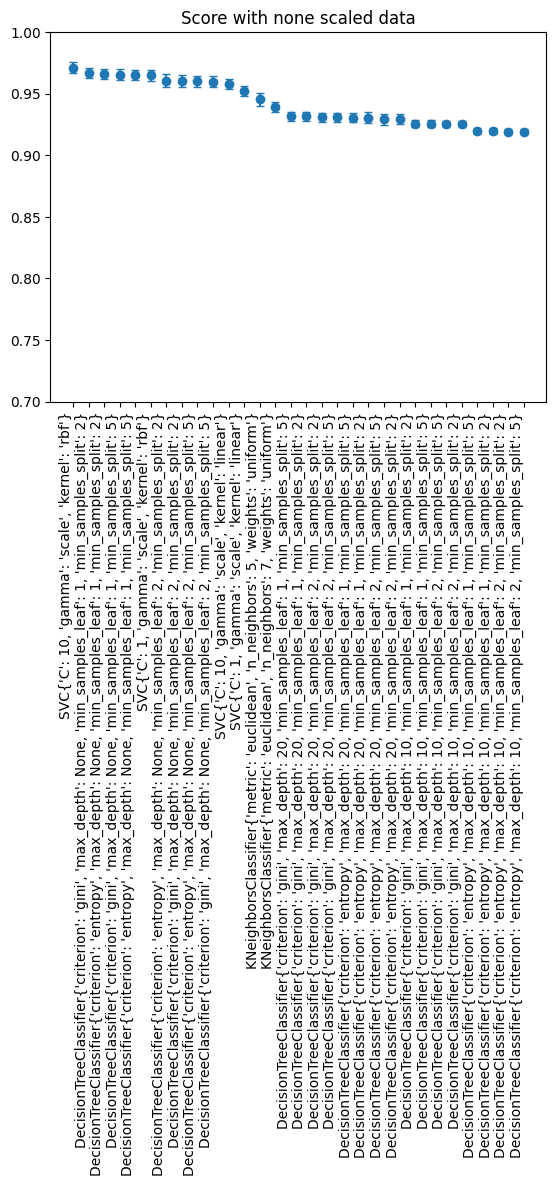

In [100]:
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.title('Score with none scaled data')
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.ylim(0.7,1)
plt.xticks(rotation=90, ha='right')
plt.show()

In [113]:
# Hàm huấn luyện và đánh giá mô hình
def train_and_evaluate_model(model, model_name):
    # Huấn luyện mô hình
    model.fit
    (X_train_tfidf, y_train)
    # Dự đoán
    y_pred = model.predict(X_test_tfidf)
    # Đánh giá mô hình
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

=== Support Vector Machine ===
Accuracy: 0.9734
Precision: 0.9729
Recall: 0.9734
F1 Score: 0.9722
ROC AUC Score: 0.9573


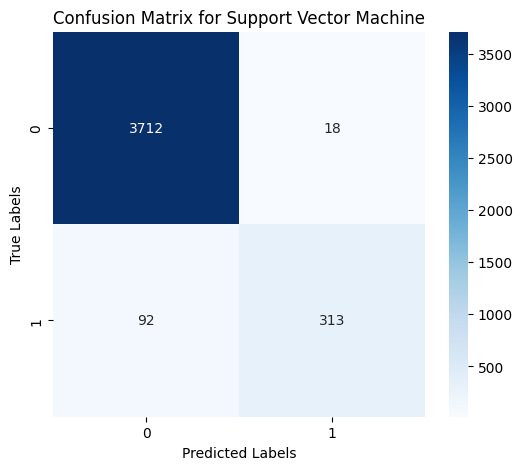

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3730
           1       0.95      0.77      0.85       405

    accuracy                           0.97      4135
   macro avg       0.96      0.88      0.92      4135
weighted avg       0.97      0.97      0.97      4135

Total running time for Support Vector Machine: 15.86 seconds

=== Decision Tree Classifier ===
Accuracy: 0.9703
Precision: 0.9693
Recall: 0.9703
F1 Score: 0.9694
ROC AUC Score: 0.9505


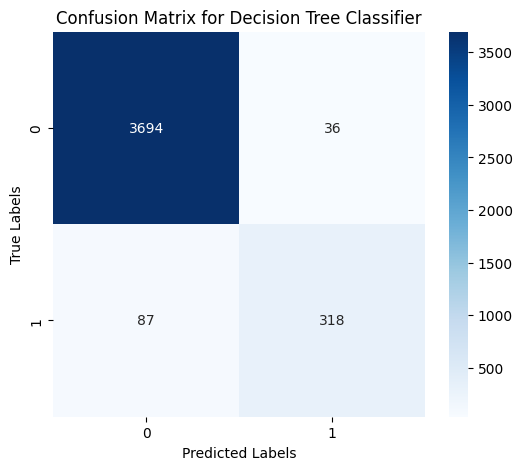

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3730
           1       0.90      0.79      0.84       405

    accuracy                           0.97      4135
   macro avg       0.94      0.89      0.91      4135
weighted avg       0.97      0.97      0.97      4135

Total running time for Decision Tree Classifier: 0.84 seconds

=== K-Nearest Neighbors ===
Accuracy: 0.9538
Precision: 0.9511
Recall: 0.9538
F1 Score: 0.9510
ROC AUC Score: 0.9274


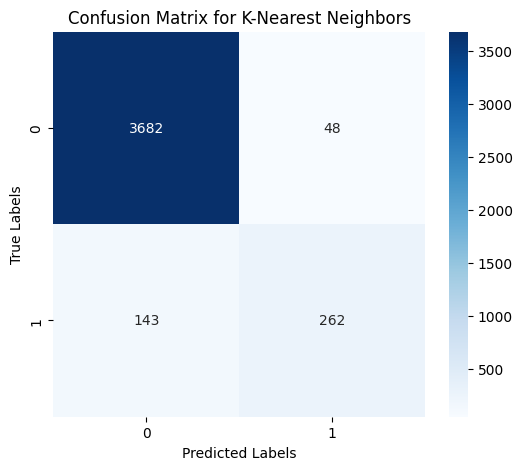

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3730
           1       0.85      0.65      0.73       405

    accuracy                           0.95      4135
   macro avg       0.90      0.82      0.85      4135
weighted avg       0.95      0.95      0.95      4135

Total running time for K-Nearest Neighbors: 1.82 seconds

                          accuracy  precision    recall  f1_score   roc_auc  \
model_name                                                                    
Support Vector Machine    0.973398   0.972857  0.973398  0.972191  0.957307   
Decision Tree Classifier  0.970254   0.969283  0.970254  0.969356  0.950548   
K-Nearest Neighbors       0.953809   0.951111  0.953809  0.951031  0.927367   

                          execution_time  Precision_class_0  \
model_name                                                    
Support Vector Machine             15.86           0.975815   
Decisio

In [115]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Hàm huấn luyện và đánh giá mô hình với kết quả trả về là một dictionary
def train_and_evaluate_model(model, model_name):
    # Start time for the model training and evaluation
    start_time = time.time()
    
    # Huấn luyện mô hình
    model.fit(X_train_tfidf, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test_tfidf)
    
    # Đánh giá mô hình
    print(f"=== {model_name} ===")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # ROC AUC Score (for binary classification; you can modify for multiclass)
    if len(set(y_test)) == 2:  # Check if binary classification
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_tfidf)[:, 1])
        print(f"ROC AUC Score: {roc_auc:.4f}")
    else:
        roc_auc = None
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Detailed Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # End time and calculate the elapsed time
    end_time = time.time()
    execution_time = round(end_time - start_time, 2)
    print(f"Total running time for {model_name}: {execution_time} seconds\n")

    # Return the evaluation metrics for comparison, including precision/recall per class
    class_report = classification_report(y_test, y_pred, output_dict=True)
    precision_per_class = {f"Precision_class_{i}": class_report[str(i)]['precision'] for i in class_report if i.isdigit()}
    recall_per_class = {f"Recall_class_{i}": class_report[str(i)]['recall'] for i in class_report if i.isdigit()}
    
    results = {
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "execution_time": execution_time
    }
    
    results.update(precision_per_class)
    results.update(recall_per_class)
    
    return results

# Create a list to store results for each model
model_results = []

# 1. Support Vector Machine (SVC)
svc_model = SVC(C=10, gamma='scale', kernel='rbf', probability=True)
svc_results = train_and_evaluate_model(svc_model, "Support Vector Machine")
model_results.append(svc_results)

# 2. Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)
decision_tree_results = train_and_evaluate_model(decision_tree_model, "Decision Tree Classifier")
model_results.append(decision_tree_results)

# 3. K-Nearest Neighbors (KNeighborsClassifier)
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='uniform')
knn_results = train_and_evaluate_model(knn_model, "K-Nearest Neighbors")
model_results.append(knn_results)

# Convert the results to a DataFrame
results_df = pd.DataFrame(model_results)

# Create a pivot table for comparison
pivot_table = results_df.set_index('model_name')

# Print the pivot table to compare the models
print(pivot_table)


## 6. Sử dụng model tốt nhất để dự đoán tập Test

In [116]:
svc_model = SVC(C=10, gamma='scale', kernel='rbf', probability=True)


In [117]:
start_time = timeit.default_timer()

svc_model.fit(X_train_tfidf,y_train)

end_time = timeit.default_timer()
execution_time = round(end_time - start_time,2)
print('Total running time: ',execution_time,' s')

Total running time:  15.55  s


In [118]:
y_predict = svc_model.predict(X_test_tfidf)

In [119]:
from sklearn.metrics import classification_report as report
print(report(y_predict,y_test,digits = 4))

              precision    recall  f1-score   support

           0     0.9952    0.9758    0.9854      3804
           1     0.7728    0.9456    0.8505       331

    accuracy                         0.9734      4135
   macro avg     0.8840    0.9607    0.9180      4135
weighted avg     0.9774    0.9734    0.9746      4135



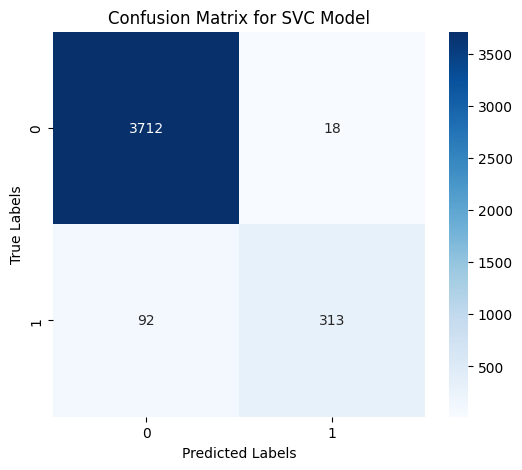

In [120]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svc_model.classes_, yticklabels=svc_model.classes_)
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()